In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [15]:
graph_m = pd.read_csv("exec_times_medium.csv", index_col="workers")
graph_m = graph_m.iloc[:-5,:]
columns = graph_m.columns

In [30]:
graph_m["speedup empirique"] =  (graph_m[columns].sum(axis=1).iloc[0] - graph_m[columns].sum(axis=1)) / graph_m[columns].sum(axis=1).iloc[0]
graph_m["speedup theorique"] = 1/((1-0.4)+(0.4/graph_m.index))-1
graph_m[["speedup empirique","speedup theorique"]]

,speedup empirique,speedup theorique
workers,,
1,0.000000,0.000000
2,0.381086,0.250000
3,0.471910,0.363636
4,0.533708,0.428571
5,0.546816,0.470588
6,0.558052,0.500000
8,0.584270,0.538462
10,0.606742,0.562500
12,0.547753,0.578947


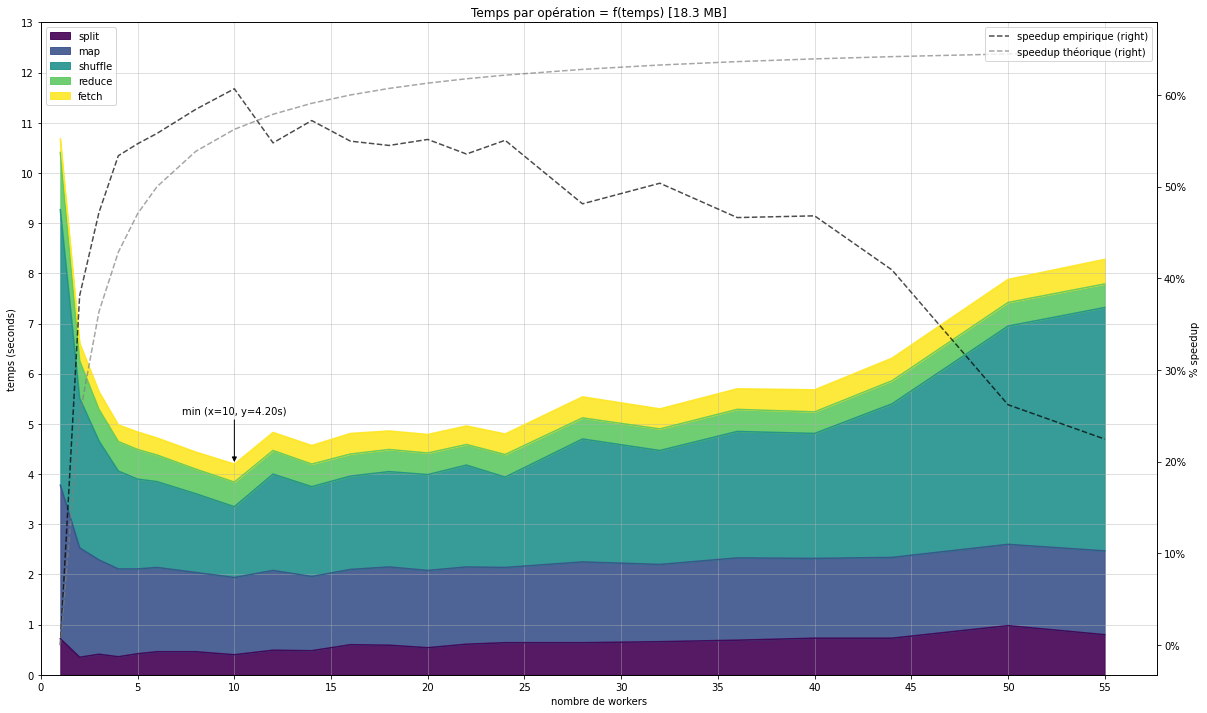

In [31]:
xmin = graph_m[columns].sum(axis=1).idxmin()
ymin = graph_m[columns].loc[xmin,:].sum()

fig = plt.figure(figsize=(20, 12));
ax = fig.add_subplot(1, 1, 1)
#ax2 = ax.twinx()

graph_m[columns].plot.area(colormap='viridis', alpha=0.9, ax=ax);

ax.annotate('min (x={}, y={:.2f}s)'.format(xmin, ymin), 
xy=(xmin, ymin), xytext=(xmin, ymin+1), ha='center',
arrowprops={'arrowstyle':'-|>','facecolor':'black'})

axr = graph_m["speedup empirique"].plot(alpha=0.7, color='black', linestyle='dashed', label='speedup empirique', secondary_y=True, ax=ax);
graph_m["speedup theorique"].plot(alpha=0.7, color='grey', linestyle='dashed', label='speedup théorique', secondary_y=True, ax=axr);

axr.set_ylabel('% speedup', );
axr.yaxis.set_major_formatter(mtick.PercentFormatter(1));
axr.legend(loc='upper right')
ax.set_xlabel('nombre de workers');
ax.set_xticks(np.arange(0, 56, 5))
ax.set_xlim(xmin=0)
ax.set_ylabel('temps (seconds)');
ax.set_yticks(np.arange(0, 14, 1));
ax.set_ylim(ymin=0)
ax.set_title('Temps par opération = f(temps) [18.3 MB]');
ax.legend(loc='upper left');

ax.grid(visible=True, alpha=0.5, which='major');

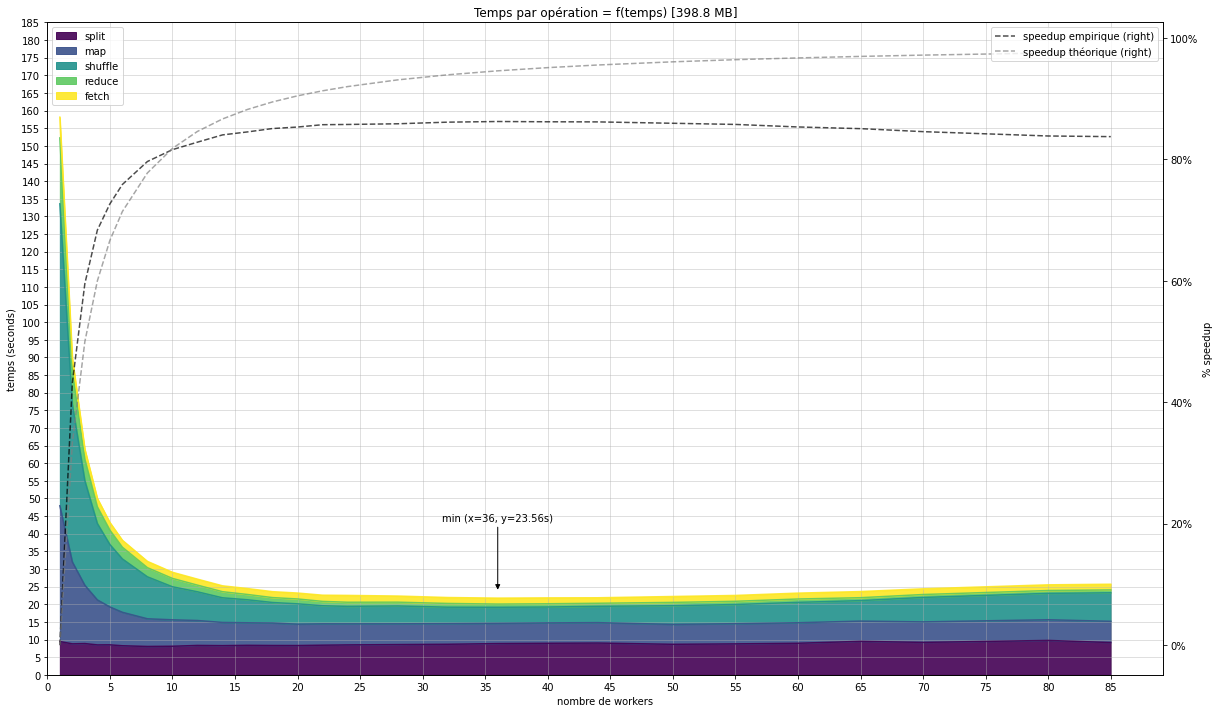

In [27]:
graph_l = pd.read_csv("exec_times_large.csv", index_col="workers")

graph_l["speedup empirique"] =  (graph_l[columns].sum(axis=1).iloc[0] - graph_l[columns].sum(axis=1)) / graph_l[columns].sum(axis=1).iloc[0]
graph_l["speedup theorique"] = 1/((1-0.5)+(0.5/graph_l.index))-1
graph_l[["speedup empirique","speedup theorique"]]

xmin = graph_l.sum(axis=1).idxmin()
ymin = graph_l.loc[xmin,:].sum()

fig = plt.figure(figsize=(20, 12));
ax = fig.add_subplot(1, 1, 1)

graph_l[columns].plot.area(colormap='viridis', alpha=0.9, ax=ax);

ax.annotate('min (x={}, y={:.2f}s)'.format(xmin, ymin), 
xy=(xmin, ymin), xytext=(xmin, ymin+20), ha='center',
arrowprops={'arrowstyle':'-|>','facecolor':'black'})

axr = graph_l["speedup empirique"].plot(alpha=0.7, color='black', linestyle='dashed', label='speedup empirique', secondary_y=True, ax=ax);
graph_l["speedup theorique"].plot(alpha=0.7, color='grey', linestyle='dashed', label='speedup théorique', secondary_y=True, ax=axr);

axr.set_ylabel('% speedup', );
axr.yaxis.set_major_formatter(mtick.PercentFormatter(1));
axr.legend(loc='upper right')
ax.set_xlabel('nombre de workers');
ax.set_xticks(np.arange(0, 86, 5));
ax.set_xlim(xmin=0)
ax.set_ylabel('temps (seconds)');
ax.set_yticks(np.arange(0, 190, 5));
ax.set_ylim(ymin=0)
ax.set_title('Temps par opération = f(temps) [398.8 MB]');
ax.legend(loc='upper left');

ax.grid(visible=True, alpha=0.5, which='major');